# The impact of HIV/AIDS and factors that influence the epidemic

## Context and Objective

A person infected with Human Immunodeficiency Virus (HIV) can develop the Acquired Immunodeficiency Syndrome (AIDS). 
When AIDS occurs, the human immune system may be severely impacted which can lead to its a gradual decline and, ultimately, failure. For this reason, the human body becomes exposed to other infections or opportunistic cancers — that wouldn't usually cause serious problems in a person with a healthy immune system. 

Currently, there are 38 million people around the world living with HIV, which has no cure. Due to the damage it may cause in our immune system, HIV/AIDS is one of the leading causes of death in the world, particularly across Sub-Saharan Africa.

Due to its negative impact on the health of our society as whole, I would like to explore which factors have the most importance on the HIV prevalence, by building a regression model on a selection of features. Also, the model can predict the HIV prevalence on countries that are yet to research this issue.

### Import Libraries

In [50]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import folium as f
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [66]:
population_per_country =pd.melt(population_per_country, id_vars = ["country"],\
                                value_name = "Population per Country", var_name ="Year")
population_per_country.rename(columns = {"country": "Country"}, inplace = True)
population_per_country = population_per_country.astype({"Year":"int64"})
population_per_country

,Country,Year,Population per Country
0,Afghanistan,1800,3280000
1,Albania,1800,400000
2,Algeria,1800,2500000
3,Andorra,1800,2650
4,Angola,1800,1570000
...,...,...,...
58690,Venezuela,2100,34200000
58691,Vietnam,2100,97400000
58692,Yemen,2100,53200000
58693,Zambia,2100,81500000


Firstly, I wanted to explore the importance of the AIDS pandemic as cause of death compared to other causes.

In [51]:
deaths_by_cause = pd.read_csv("archive/Deaths_by_Cause/annual-number-of-deaths-by-cause.csv")
deaths_by_cause
# Source: https://ourworldindata.org/hiv-aids

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),...,Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Terrorism (deaths)
0,Afghanistan,AFG,1990,NaN,4575.180311,1453.044977,3698.889864,4332.690583,32.098129,8817.260208,...,10061.873743,311.776082,170.742286,0.000000,226.789403,1607.703797,46498.085024,740.448500,1279.945985,12.0
1,Afghanistan,AFG,1991,NaN,4762.068567,1468.860745,3743.187336,4288.640464,37.524158,8588.463794,...,10171.333511,311.500538,172.032657,1349.999434,164.830417,1558.132316,46967.361037,762.245179,1524.641593,68.0
2,Afghanistan,AFG,1992,NaN,5531.136933,1524.528468,3894.366133,4475.257542,50.670559,8924.932420,...,10592.367581,338.614263,190.404111,614.000083,92.522183,1617.721576,48355.558515,856.912927,1684.808857,49.0
3,Afghanistan,AFG,1993,NaN,6613.963510,1598.643747,4136.479100,4909.050325,58.433049,11976.501319,...,11126.644646,382.401317,217.622614,109.999998,104.167461,1931.808553,50072.563899,975.603772,1906.959925,NaN
4,Afghanistan,AFG,1994,NaN,7341.204565,1649.977411,4318.692618,5352.634058,65.531176,13296.448475,...,11477.937575,417.717979,236.240573,160.000003,112.072652,2351.629206,51416.815442,1028.742412,2229.924043,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6681,Zimbabwe,ZWE,2013,NaN,2769.257442,1464.553211,3290.553727,13474.832150,31808.820281,5129.483596,...,10773.570087,620.024209,410.802638,125.000002,44.403541,3507.171892,16900.858090,2561.496069,1185.280625,1.0
6682,Zimbabwe,ZWE,2014,NaN,2728.371376,1428.155866,3284.347650,12924.005409,24602.870777,4946.075661,...,10856.786196,609.387024,406.351616,8.500000,43.073231,3380.319464,16755.843066,2554.170577,1173.474099,0.0
6683,Zimbabwe,ZWE,2015,NaN,2725.852725,1413.581787,3303.600304,12490.005497,20841.883197,4737.642966,...,11005.829309,599.262647,404.641729,15.500000,42.139866,3263.941226,16691.109079,2583.031015,1175.264012,NaN
6684,Zimbabwe,ZWE,2016,NaN,2731.304860,1413.648556,3345.340586,12169.197080,18491.624779,4602.100769,...,11240.734416,596.297688,405.940831,31.000000,41.675497,3188.723249,16781.946571,2619.243794,1178.128366,NaN


In [52]:
number_deaths_10years = deaths_by_cause.groupby(by = "Year").sum().tail(10)
number_deaths_10years

,Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),Deaths - Intestinal infectious diseases - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),...,Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Terrorism (deaths)
Year,,,,,,,,,,,,,,,,,,,,,
2008,6.062594e+06,5.539776e+06,9.910693e+06,6.248591e+06,9.057822e+06,8.350615e+06,728001.845248,1.245687e+07,1.623774e+06,1.627373e+06,...,3.790206e+07,604303.903718,375849.546415,1.171543e+06,286992.944994,1.451377e+06,7.166167e+07,3.707020e+06,1.960553e+06,27471.0
2009,6.073840e+06,5.596296e+06,1.000925e+07,6.129196e+06,8.651137e+06,8.339956e+06,716865.666462,1.238354e+07,1.589376e+06,1.600351e+06,...,3.868665e+07,597611.806627,372618.080980,4.381932e+04,279375.815151,1.419668e+06,7.284881e+07,3.708551e+06,1.962840e+06,27819.0
2010,6.064868e+06,5.656565e+06,1.011838e+07,6.004884e+06,8.118387e+06,8.298806e+06,702308.553559,1.231587e+07,1.545087e+06,1.575762e+06,...,3.950237e+07,593568.011847,372556.715293,1.221363e+06,560634.000220,1.436102e+06,7.442574e+07,3.725360e+06,1.971769e+06,23481.0
2011,6.028472e+06,5.705183e+06,1.022522e+07,5.888084e+06,7.543217e+06,8.002539e+06,696981.283890,1.228761e+07,1.516478e+06,1.542934e+06,...,4.027591e+07,585466.357919,367172.682421,1.574790e+05,270183.487840,1.385053e+06,7.549285e+07,3.708553e+06,1.954228e+06,24738.0
2012,5.993071e+06,5.760178e+06,1.033549e+07,5.761748e+06,6.962141e+06,7.693169e+06,689573.729844,1.224406e+07,1.479866e+06,1.517652e+06,...,4.107201e+07,579079.420972,363575.571668,3.091595e+04,271056.255533,1.291888e+06,7.665239e+07,3.672289e+06,1.967375e+06,46491.0
2013,5.901381e+06,5.811054e+06,1.044571e+07,5.658129e+06,6.390076e+06,7.420139e+06,681123.433323,1.218400e+07,1.458211e+06,1.481823e+06,...,4.181209e+07,571687.448919,361188.171192,8.723451e+04,261804.928125,1.244509e+06,7.739790e+07,3.639858e+06,1.939690e+06,66819.0
2014,5.878199e+06,5.897098e+06,1.062058e+07,5.578772e+06,5.910480e+06,7.219389e+06,672607.252303,1.214859e+07,1.435772e+06,1.451406e+06,...,4.296932e+07,565682.517603,359234.652670,3.033795e+04,258528.255554,1.204702e+06,7.900159e+07,3.652175e+06,1.913795e+06,133470.0
2015,5.842366e+06,6.011792e+06,1.084026e+07,5.515010e+06,5.517308e+06,7.035845e+06,660032.229583,1.217635e+07,1.402319e+06,1.431129e+06,...,4.442636e+07,565596.627171,359168.908612,6.229395e+04,268678.375146,1.175406e+06,8.144131e+07,3.663150e+06,1.926486e+06,116559.0
2016,5.830975e+06,6.131253e+06,1.105491e+07,5.463658e+06,5.128888e+06,6.915846e+06,644642.631046,1.215873e+07,1.391194e+06,1.411541e+06,...,4.556043e+07,564202.503797,355668.891630,3.435597e+04,254170.791289,1.142581e+06,8.322147e+07,3.687300e+06,1.902915e+06,104613.0


In [53]:
main_causes = number_deaths_10years.sum().sort_values(ascending = False).head(15)
main_diseases = [disease.replace("Deaths - ", "").replace(" - Sex: Both - Age: All Ages (Number)", "")\
                 for disease in main_causes.index]
main_diseases

['Cardiovascular diseases',
 'Neoplasms',
 'Chronic respiratory diseases',
 'Lower respiratory infections',
 'Alzheimer disease and other dementias',
 'Digestive diseases',
 'Neonatal disorders',
 'Diarrheal diseases',
 'HIV/AIDS',
 'Road injuries',
 'Cirrhosis and other chronic liver diseases',
 'Tuberculosis',
 'Diabetes mellitus',
 'Chronic kidney disease',
 'Self-harm']

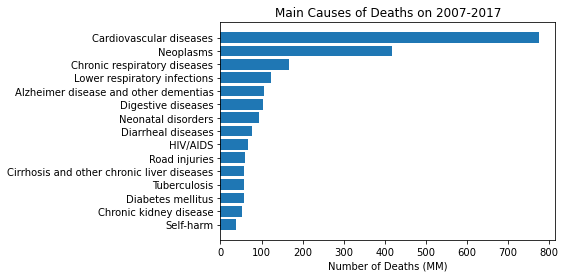

In [54]:
plt.barh(main_diseases[::-1],main_causes[::-1]/1e6)
plt.title("Main Causes of Deaths on 2007-2017")
plt.xlabel("Number of Deaths (MM)")
plt.show()

As we can see, HIV/AIDS is ranked 9th in the main causes of deaths during the 2007-2017 decade, causing around 68 million people to lose thei lives.

In [55]:
main_causes

Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)                       7.765984e+08
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                     4.184861e+08
Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)                  1.672427e+08
Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)                  1.224539e+08
Deaths - Alzheimer disease and other dementias - Sex: Both - Age: All Ages (Number)         1.049996e+08
Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)                            1.048106e+08
Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)                            9.337874e+07
Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)                            7.626976e+07
Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)                                      6.797957e+07
Deaths - Road injuries - Sex: Both - Age: All Ages (Num

To get a better picture, it is important to have an idea of the evolution of the HIV/AIDS pandemic in the past three decades. It is possible to analyse the rate of change of new cases, people living with the virus and deaths.

In [67]:
deaths_prevalence_incidence = pd.read_csv("archive/HIV _Prevalence/deaths-and-new-cases-of-hiv.csv")
deaths_prevalence_incidence.drop(columns = ["Code"], inplace = True)
deaths_prevalence_incidence=deaths_prevalence_incidence.rename(columns = {"Prevalence - HIV/AIDS - Sex: Both - Age: All Ages (Number)": "People living with HIV",\
                                                                          "Entity":"Country", "Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)":"New Cases",\
                                                                          "Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)":"Deaths"})
not_countries = ['Andean Latin America','Australasia','Caribbean','Central Asia', 'Central Europe','Central Europe, Eastern Europe, and Central Asia',\
                 'Central Latin America', 'Central Sub-Saharan Africa','East Asia', 'Eastern Europe','Eastern Sub-Saharan Africa', 'High SDI', 'High-income', 'High-income Asia Pacific',\
                 'High-middle SDI','Latin America and Caribbean','Low SDI', 'Low-middle SDI', 'Middle SDI','North Africa and Middle East', 'North America','South Asia', 'Southeast Asia',\
                 "Southeast Asia", "East Asia, and Oceania", 'Southern Latin America','Southern Sub-Saharan Africa', 'Sub-Saharan Africa', 'Western Europe', 'Western Sub-Saharan Africa',\
                 'World','Southern Sub-Saharan Africa', 'Southeast Asia, East Asia, and Oceania', 'Tropical Latin America']
deaths_prevalence_incidence = deaths_prevalence_incidence[~deaths_prevalence_incidence["Country"].isin(not_countries)]
deaths_prevalence_incidence

,Country,Year,Deaths,People living with HIV,New Cases
0,Afghanistan,1990,32.098129,3.982578e+02,78.304642
1,Afghanistan,1991,37.524158,4.380198e+02,83.233703
2,Afghanistan,1992,50.670559,5.432502e+02,104.710195
3,Afghanistan,1993,58.433049,6.688698e+02,128.605343
4,Afghanistan,1994,65.531176,7.355653e+02,136.848748
...,...,...,...,...,...
6463,Zimbabwe,2013,31808.820281,1.201485e+06,43976.732223
6464,Zimbabwe,2014,24602.870777,1.210274e+06,44922.981329
6465,Zimbabwe,2015,20841.883197,1.228892e+06,47088.617994
6466,Zimbabwe,2016,18491.624779,1.257634e+06,50759.227259


In [68]:
people_living_HIV = deaths_prevalence_incidence[["Country","Year","New Cases"]]

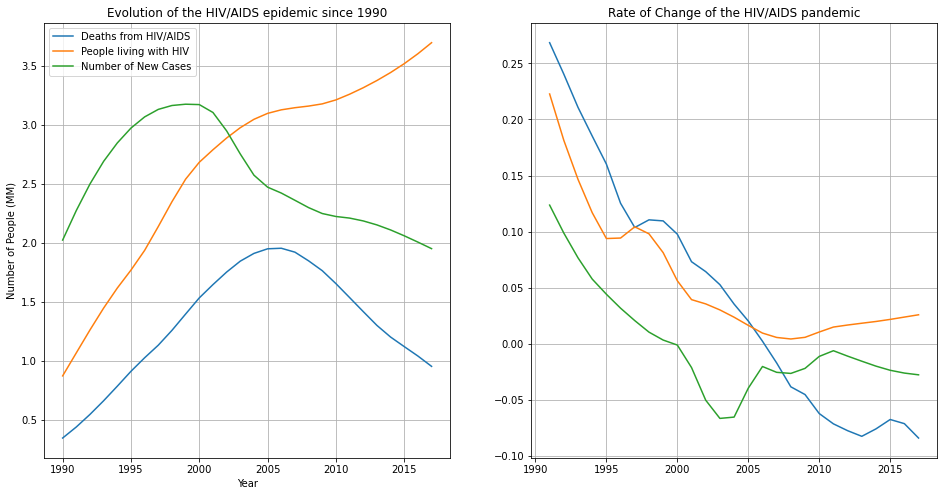

In [169]:
deaths_prevalence_incidence_year = deaths_prevalence_incidence[deaths_prevalence_incidence["Year"]>=1980].groupby(by ="Year").sum()

fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].plot(deaths_prevalence_incidence_year.index,deaths_prevalence_incidence_year["Deaths"]/1e6)
ax[0].plot(deaths_prevalence_incidence_year.index,deaths_prevalence_incidence_year["People living with HIV"]/1e7)
ax[0].plot(deaths_prevalence_incidence_year.index,deaths_prevalence_incidence_year["New Cases"]/1e6)
ax[0].set_title("Evolution of the HIV/AIDS epidemic since 1990")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of People (MM)")
ax[0].legend(["Deaths from HIV/AIDS", "People living with HIV", "Number of New Cases"])
ax[0].grid()

deaths_prevalence_incidence_year_pct = deaths_prevalence_incidence_year.pct_change()
ax[1].plot(deaths_prevalence_incidence_year_pct)
ax[1].set_title("Rate of Change of the HIV/AIDS pandemic")

plt.grid()


plt.show()

It's possible to see that the number of new cases and deaths the early 2000s. Perhaps due to a greater awareness, development of antiretrovirals treatments or usage of preservatives the number of cases and casualties start to decline steadly. The number of people, on the other hand, never stops increasing, showing that the pandemic is not close to come to an end and should be addressed accordingly.

In [56]:
art_coverage = pd.read_csv("archive/ART_Coverage/art_coverage_percent_cd4_l_350.csv")
art_coverage

,country,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,0.01,0.03,0.06
1,Algeria,0.00,0.12,0.15,0.21,0.21,0.25,NaN,NaN
2,Angola,0.05,0.04,0.09,0.15,0.17,0.27,0.32,0.36
3,Argentina,0.66,0.63,0.69,0.71,0.70,0.81,0.77,0.79
4,Armenia,0.00,0.05,0.07,0.11,0.14,0.12,0.16,0.22
...,...,...,...,...,...,...,...,...,...
112,Venezuela,NaN,NaN,NaN,NaN,NaN,0.74,0.80,0.79
113,Vietnam,0.01,0.04,0.10,0.19,0.25,0.44,0.52,0.58
114,Yemen,NaN,NaN,NaN,NaN,NaN,0.04,0.07,0.08
115,Zambia,0.05,0.12,0.21,0.36,0.51,0.81,0.72,0.82


In [57]:
art_coverage = pd.melt(art_coverage, id_vars = "country", var_name = "Year", value_name= "ART Coverage (%)")

In [58]:
art_coverage.rename(columns = {"country":"Country"}, inplace = True)
art_coverage = art_coverage.astype({"Year":"int64"})
art_coverage

,Country,Year,ART Coverage (%)
0,Afghanistan,2004,NaN
1,Algeria,2004,0.00
2,Angola,2004,0.05
3,Argentina,2004,0.66
4,Armenia,2004,0.00
...,...,...,...
931,Venezuela,2011,0.79
932,Vietnam,2011,0.58
933,Yemen,2011,0.08
934,Zambia,2011,0.82


In [59]:
art_coverage.describe()

,Year,ART Coverage (%)
count,936.000000,877.000000
mean,2007.500000,0.305108
std,2.292513,0.251134
min,2004.000000,0.000000
25%,2005.750000,0.100000
50%,2007.500000,0.230000
75%,2009.250000,0.460000
max,2011.000000,0.950000


In [60]:
gov_share_health = pd.read_excel("archive\Government_health_expenditure.xls", sheet_name = "Data")
gov_share_health = gov_share_health.drop([0,1])
gov_share_health.columns = gov_share_health.iloc[0]
gov_share_health = gov_share_health.drop([2])
gov_share_health_clean = gov_share_health[:]
gov_share_health = gov_share_health.drop(columns = ["Country Code", "Indicator Name", "Indicator Code"])
gov_share_health = pd.melt(gov_share_health, id_vars = "Country Name", value_name = "Govt. Share on Health Expenditure (%)", var_name = "Year")
gov_share_health["Govt. Share on Health Expenditure (%)"] = 100 - gov_share_health["Govt. Share on Health Expenditure (%)"]
gov_share_health

,Country Name,Year,Govt. Share on Health Expenditure (%)
0,Aruba,1960.0,NaN
1,Afghanistan,1960.0,NaN
2,Angola,1960.0,NaN
3,Albania,1960.0,NaN
4,Andorra,1960.0,NaN
...,...,...,...
16099,Kosovo,2020.0,NaN
16100,"Yemen, Rep.",2020.0,NaN
16101,South Africa,2020.0,NaN
16102,Zambia,2020.0,NaN


In [61]:
country_df = pd.read_csv("archive\continents.csv")
country_df.rename(columns={"Code":"StateAbb"}, inplace = True)
country_df = country_df.query('Continent != "Antarctica"')
country_df = pd.get_dummies(country_df, columns = ["Continent"])
country_df.drop(columns = ["StateAbb"], inplace = True)
country_df

,Country,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,Afghanistan,0,1,0,0,0,0
1,Albania,0,0,1,0,0,0
2,Algeria,1,0,0,0,0,0
3,American Samoa,0,0,0,0,1,0
4,Andorra,0,0,1,0,0,0
...,...,...,...,...,...,...,...
245,Western Sahara,1,0,0,0,0,0
246,Yemen,0,1,0,0,0,0
247,Zambia,1,0,0,0,0,0
248,Zimbabwe,1,0,0,0,0,0


In [62]:
religion_preference = pd.read_csv("archive\WRP national data.csv")
religion_preference = religion_preference[(religion_preference["YEAR"]=="2005")&
                                         (religion_preference["RELIAB"].isin([1,2]))]

columns = pd.Series(religion_preference.columns)
pct_columns = columns[columns.str.contains("PCT")==True].tolist()
pct_columns.append("COUNTRY")
pct_columns.reverse()
pct_columns.remove("SUMPCT")
religion_preference = religion_preference[pct_columns]

religion_preference.set_index( "COUNTRY", inplace = True)
religion_preference["Code"]= religion_preference.idxmax(axis = 1)
religion_preference.drop(columns = pct_columns, errors = "ignore", inplace = True)
religion_preference.reset_index(inplace = True)
religion_preference.rename(columns = {"COUNTRY":"Country"}, inplace = True)

relig_df = pd.DataFrame(np.array([['CHGENPCT',"Christianity"],['NORELPCT',"Non Religious"],['ISGENPCT',"Islamic"],['ANGENPCT',"Animist"],['HIGENPCT',"Hindu"],['judgenpct',"Judaism"],['SYGENPCT',"Syncretic"],['BUGENPCT',"Buddhism"],['SHGENPCT', "Shinto"]]), columns = ["Code", "Religion"])

religion_preference = pd.merge(religion_preference,relig_df, on = "Code")
religion_preference.drop(columns = "Code", inplace = True)

religion_preference


,Country,Religion
0,United States of America,Christianity
1,Canada,Christianity
2,Bahamas,Christianity
3,Cuba,Christianity
4,Haiti,Christianity
...,...,...
145,Myanmar,Buddhism
146,Thailand,Buddhism
147,Cambodia,Buddhism
148,Singapore,Buddhism


In [63]:
median_age = pd.read_csv("archive\median-age.csv")
median_age.rename(columns = {"Entity":"Country","UN Population Division (Median Age) (2017)":"Median Age"}, inplace = True)
median_age.drop(columns = ["Code"], inplace = True)
median_age.set_index("Year", inplace = True)
median_age = pd.pivot_table(median_age, columns=["Country"], index = ["Year"])
median_age = median_age.reindex(list(range(1950, 2021, 1)))
median_age.interpolate(inplace = True)
median_age = median_age.reindex()
median_age.reset_index(inplace = True)
median_age = median_age.droplevel(0,axis = 1)
median_age.rename(columns = {"":"Year"}, inplace = True)
median_age = median_age.melt(id_vars = "Year", var_name = "Country", value_name = "Median Age")
median_age

,Year,Country,Median Age
0,1950,Afghanistan,19.400000
1,1951,Afghanistan,19.360000
2,1952,Afghanistan,19.320000
3,1953,Afghanistan,19.280001
4,1954,Afghanistan,19.240001
...,...,...,...
17106,2016,Zimbabwe,19.120000
17107,2017,Zimbabwe,19.240000
17108,2018,Zimbabwe,19.360000
17109,2019,Zimbabwe,19.480000


Now, let's use One Hot Encoding to tranform the categorical columns "Religion"
to numerical columns, in order to use this data on our model.

In [64]:
religion_preference = pd.get_dummies(religion_preference, columns = ["Religion"])
religion_preference

,Country,Religion_Animist,Religion_Buddhism,Religion_Christianity,Religion_Hindu,Religion_Islamic,Religion_Non Religious,Religion_Shinto,Religion_Syncretic
0,United States of America,0,0,1,0,0,0,0,0
1,Canada,0,0,1,0,0,0,0,0
2,Bahamas,0,0,1,0,0,0,0,0
3,Cuba,0,0,1,0,0,0,0,0
4,Haiti,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
145,Myanmar,0,1,0,0,0,0,0,0
146,Thailand,0,1,0,0,0,0,0,0
147,Cambodia,0,1,0,0,0,0,0,0
148,Singapore,0,1,0,0,0,0,0,0


In [65]:
population_per_country = pd.read_csv("archive/HIV _Prevalence/population_total.csv")
population_per_country

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,1000000,978000,957000,936000,916000,896000,876000,857000,838000,...,35500000,35400000,35200000,35100000,35000000,34800000,34700000,34500000,34400000,34200000
191,Vietnam,4000000,4100000,4200000,4310000,4410000,4530000,4640000,4750000,4870000,...,100000000,100000000,99700000,99400000,99100000,98800000,98400000,98100000,97800000,97400000
192,Yemen,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,...,54500000,54400000,54300000,54100000,54000000,53800000,53700000,53500000,53400000,53200000
193,Zambia,747000,758000,770000,782000,794000,806000,818000,831000,843000,...,74400000,75200000,76000000,76800000,77600000,78400000,79200000,80000000,80800000,81500000


In [70]:
population_per_country.dtypes

Country                   object
Year                       int64
Population per Country     int64
dtype: object

In [71]:
HIV_prevalence = pd.merge(people_living_HIV, population_per_country, on =["Country", "Year"])
HIV_prevalence

,Country,Year,New Cases,Population per Country
0,Afghanistan,1990,78.304642,12400000
1,Afghanistan,1991,83.233703,13300000
2,Afghanistan,1992,104.710195,14500000
3,Afghanistan,1993,128.605343,15800000
4,Afghanistan,1994,136.848748,17100000
...,...,...,...,...
4923,Zimbabwe,2013,43976.732223,13400000
4924,Zimbabwe,2014,44922.981329,13600000
4925,Zimbabwe,2015,47088.617994,13800000
4926,Zimbabwe,2016,50759.227259,14000000


In [72]:
HIV_prevalence["HIV Prevalence (%)"] = (HIV_prevalence["New Cases"]/HIV_prevalence["Population per Country"])*100
HIV_prevalence["HIV Prevalence (%)"].describe()

count    4928.000000
mean        0.079796
std         0.214928
min         0.000000
25%         0.002663
50%         0.009005
75%         0.041957
max         2.068763
Name: HIV Prevalence (%), dtype: float64

In [73]:
geo = r"C:\Users\pedro\OneDrive\MicroMasters_Data_Science\Python_for_Data_Science\Final Project\archive\custom.geo.json"
geo_json = json.load(open(geo))

In [74]:
geo = r"C:\Users\pedro\OneDrive\MicroMasters_Data_Science\Python_for_Data_Science\Final Project\archive\custom.geo.json"
mapa = f.Map(
    width=800, height=400,
    zoom_start=3
)

f.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=HIV_prevalence[HIV_prevalence["Year"]==2017],
    bins=[0, 0.01, 0.1, 1, 2],
    columns=['Country', "HIV Prevalence (%)"],
    key_on = "feature.properties.name",
    fill_color="YlGn",
    nan_fill_color = "white",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='HIV Prevalence (%)'
).add_to(mapa)
mapa

In [75]:
HIV_prevalence.drop(columns=["New Cases", "Population per Country"], inplace=True)

In [76]:
HIV_prevalence.max()

Country               Zimbabwe
Year                      2017
HIV Prevalence (%)    2.068763
dtype: object

In [77]:
HIV_prevalence.describe()

,Year,HIV Prevalence (%)
count,4928.000000,4928.000000
mean,2003.500000,0.079796
std,8.078567,0.214928
min,1990.000000,0.000000
25%,1996.750000,0.002663
50%,2003.500000,0.009005
75%,2010.250000,0.041957
max,2017.000000,2.068763


In [78]:
files = os.listdir("archive\Data_Extract_From_World_Development_Indicators")
files

['children_out_of_school_primary.csv',
 'GDP per Capita (US$).csv',
 'primary_completion_rate_total_percent_of_relevant_age_group.csv',
 'Total net enrolment rate by level of education (%).csv']

In [79]:
GDP_per_capita = pd.read_csv("archive\Data_Extract_From_World_Development_Indicators\GDP per Capita (US$).csv")
GDP_per_capita

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,543,529.0,576.0,588.0,584.0,574.0,571.0,572.0,568.0,571.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4860.0,5070.0,5210.0
2,Algeria,2480.0,2090.0,1640.0,2150.0,2210.0,2290.0,2120.0,2260.0,2430.0,...,4480,4520.0,4590.0,4620.0,4700.0,4780.0,4830.0,4790.0,4760.0,4710.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40900,41200.0,39800.0,39100.0,40900.0,42100.0,44100.0,44400.0,45100.0,45900.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3590,3580.0,3750.0,3800.0,3840.0,3750.0,3530.0,3410.0,3230.0,3100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Venezuela,12500.0,12400.0,13000.0,13000.0,14000.0,14100.0,13800.0,13800.0,14300.0,...,13800,14200.0,14700.0,14700.0,14000.0,NaN,NaN,NaN,NaN,NaN
187,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1320,1390.0,1440.0,1510.0,1580.0,1670.0,1750.0,1850.0,1960.0,2080.0
188,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1330,1130.0,1130.0,1150.0,1120.0,785.0,694.0,643.0,633.0,NaN
189,Zambia,1500.0,1470.0,1390.0,1400.0,1520.0,1720.0,1570.0,1650.0,1620.0,...,1490,1530.0,1590.0,1620.0,1640.0,1640.0,1650.0,1660.0,1680.0,1660.0


In [80]:
GDP_per_capita = GDP_per_capita.melt(id_vars = ["country"], \
                                     value_name = "GDP per Capita (US$)", var_name = "Year")
GDP_per_capita.rename(columns = {"country":"Country"}, inplace = True)
GDP_per_capita.dropna(inplace=True)
GDP_per_capita = GDP_per_capita.astype({"Year":"int64"})
GDP_per_capita

,Country,Year,GDP per Capita (US$)
2,Algeria,1960,2480.0
6,Argentina,1960,5640.0
8,Australia,1960,19400.0
9,Austria,1960,13000.0
11,Bahamas,1960,17700.0
...,...,...,...
11453,Uzbekistan,2019,2460.0
11454,Vanuatu,2019,2870.0
11456,Vietnam,2019,2080.0
11458,Zambia,2019,1660.0


In [81]:
GDP_per_capita.describe()

,Year,GDP per Capita (US$)
count,8999.000000,8999.000000
mean,1993.501278,10964.277031
std,16.410242,18092.558406
min,1960.000000,132.000000
25%,1981.000000,1200.000000
50%,1995.000000,3450.000000
75%,2007.000000,12400.000000
max,2019.000000,196000.000000


In [82]:
primary_completion_rate_total_percent_of_relevant_age_group = \
pd.read_csv("archive\Data_Extract_From_World_Development_Indicators\primary_completion_rate_total_percent_of_relevant_age_group.csv")
primary_completion_rate_total_percent_of_relevant_age_group.interpolate(method ='linear', limit_direction ='forward', inplace = True) 
primary_completion_rate_total_percent_of_relevant_age_group = primary_completion_rate_total_percent_of_relevant_age_group.melt(id_vars = ["country"], value_name = "Primary Completion rate", var_name = "Year")
primary_completion_rate_total_percent_of_relevant_age_group.rename(columns = {"country":"Country"}, inplace = True)
primary_completion_rate_total_percent_of_relevant_age_group["Primary Completion rate (%)"]=primary_completion_rate_total_percent_of_relevant_age_group["Primary Completion rate"]*100
primary_completion_rate_total_percent_of_relevant_age_group.drop(columns = "Primary Completion rate", inplace = True)
primary_completion_rate_total_percent_of_relevant_age_group = primary_completion_rate_total_percent_of_relevant_age_group.astype({"Year":"int64"})
primary_completion_rate_total_percent_of_relevant_age_group

,Country,Year,Primary Completion rate (%)
0,Afghanistan,1970,NaN
1,Albania,1970,NaN
2,Algeria,1970,NaN
3,Angola,1970,NaN
4,Antigua and Barbuda,1970,NaN
...,...,...,...
9481,Venezuela,2020,63.0
9482,Vietnam,2020,63.0
9483,Yemen,2020,63.0
9484,Zambia,2020,63.0


In [83]:
woman_employed = pd.read_csv("archive/female-employment.csv")
woman_employed.rename(columns = {"Entity":"Country", "Employment to population ratio, 15+, female (%) (modeled ILO estimate)":"Employment to population ratio" }, inplace = True)
woman_employed.drop(columns = ["Code"], inplace = True)
woman_employed

,Country,Year,Employment to population ratio
0,Afghanistan,1991,12.688000
1,Afghanistan,1992,12.811000
2,Afghanistan,1993,12.724000
3,Afghanistan,1994,12.724000
4,Afghanistan,1995,12.649000
...,...,...,...
6286,Zimbabwe,2013,73.286003
6287,Zimbabwe,2014,73.472000
6288,Zimbabwe,2015,73.603996
6289,Zimbabwe,2016,73.724998


In [84]:
primary_completion_rate_total_percent_of_relevant_age_group.describe()

,Year,Primary Completion rate (%)
count,9486.000000,9370.000000
mean,1995.000000,77.513861
std,14.720377,23.721682
min,1970.000000,1.520000
25%,1982.000000,62.783333
50%,1995.000000,83.931250
75%,2008.000000,96.600000
max,2020.000000,135.000000


In [85]:
df = pd.merge(art_coverage, GDP_per_capita, on=["Country", "Year"])
df = pd.merge(df, median_age, on=["Country", "Year"])
df = pd.merge(df, primary_completion_rate_total_percent_of_relevant_age_group, on = ["Country","Year"])
df = pd.merge(df, gov_share_health, left_on = ["Country", "Year"], right_on = ["Country Name", "Year"])
df = pd.merge(df, religion_preference, on = "Country")
df = pd.merge(df, woman_employed, on = ["Country","Year"])
df = pd.merge(df, country_df, on = "Country")
df = pd.merge(HIV_prevalence[["HIV Prevalence (%)", "Country", "Year"]], df,on=["Country", "Year"])

df

,HIV Prevalence (%),Country,Year,ART Coverage (%),GDP per Capita (US$),Median Age,Primary Completion rate (%),Country Name,Govt. Share on Health Expenditure (%),Religion_Animist,...,Religion_Non Religious,Religion_Shinto,Religion_Syncretic,Employment to population ratio,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,0.000916,Afghanistan,2004,NaN,333.0,16.020000,NaN,Afghanistan,94.464728,0,...,0,0,0,13.581000,0,1,0,0,0,0
1,0.000952,Afghanistan,2005,NaN,357.0,16.100000,NaN,Afghanistan,94.680652,0,...,0,0,0,13.921000,0,1,0,0,0,0
2,0.000956,Afghanistan,2006,NaN,365.0,16.080000,NaN,Afghanistan,95.313461,0,...,0,0,0,13.512000,0,1,0,0,0,0
3,0.000961,Afghanistan,2007,NaN,406.0,16.060000,NaN,Afghanistan,94.346634,0,...,0,0,0,13.263000,0,1,0,0,0,0
4,0.001008,Afghanistan,2008,NaN,412.0,16.040000,NaN,Afghanistan,93.879003,0,...,0,0,0,12.922000,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,0.567273,Zimbabwe,2007,0.14,890.0,18.419999,86.9,Zimbabwe,NaN,0,...,0,0,0,73.231003,1,0,0,0,0,0
661,0.472930,Zimbabwe,2008,0.22,726.0,18.480000,91.0,Zimbabwe,NaN,0,...,0,0,0,73.188004,1,0,0,0,0,0
662,0.399558,Zimbabwe,2009,0.37,803.0,18.540000,85.2,Zimbabwe,NaN,0,...,0,0,0,72.961998,1,0,0,0,0,0
663,0.360225,Zimbabwe,2010,0.54,948.0,18.600000,98.0,Zimbabwe,74.184749,0,...,0,0,0,72.845001,1,0,0,0,0,0


In [86]:
df.isna().sum()

HIV Prevalence (%)                        0
Country                                   0
Year                                      0
ART Coverage (%)                         27
GDP per Capita (US$)                      0
Median Age                                0
Primary Completion rate (%)               8
Country Name                              0
Govt. Share on Health Expenditure (%)     6
Religion_Animist                          0
Religion_Buddhism                         0
Religion_Christianity                     0
Religion_Hindu                            0
Religion_Islamic                          0
Religion_Non Religious                    0
Religion_Shinto                           0
Religion_Syncretic                        0
Employment to population ratio            0
Continent_Africa                          0
Continent_Asia                            0
Continent_Europe                          0
Continent_North America                   0
Continent_Oceania               

In [87]:
df.dropna(inplace=True)
df.drop(columns = ["Country Name"], inplace = True)
df.reset_index(drop = True, inplace = True)

In [88]:
cols = df.columns
feature_cols = cols[~cols.str.contains("Religion")]
feature_cols = feature_cols[~feature_cols.isin([ "Country", "Median Age"])]
feature_cols

Index(['HIV Prevalence (%)', 'Year', 'ART Coverage (%)',
       'GDP per Capita (US$)', 'Primary Completion rate (%)',
       'Govt. Share on Health Expenditure (%)',
       'Employment to population ratio', 'Continent_Africa', 'Continent_Asia',
       'Continent_Europe', 'Continent_North America', 'Continent_Oceania',
       'Continent_South America'],
      dtype='object')

In [89]:
y, X = df.iloc[:, 0], df.iloc[:,2:]

In [116]:
treeregressor = DecisionTreeRegressor(criterion = "mae", max_depth = 30)
cv = ShuffleSplit(n_splits=5, test_size=0.2)
cv2 = KFold(n_splits=5, shuffle = True)
scores = cross_val_score(treeregressor, X, y,scoring = "neg_mean_absolute_error", cv=cv)
scores.mean(),scores.std() 

(-0.02983875772414153, 0.010386268883788281)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [92]:
treeregressor.fit(X_train,y_train)
y_pred = treeregressor.predict(X_test)

In [93]:
y_test.describe(), y_test.median()

(count    189.000000
 mean       0.129451
 std        0.247975
 min        0.000276
 25%        0.010040
 50%        0.026827
 75%        0.114729
 max        1.369935
 Name: HIV Prevalence (%), dtype: float64,
 0.026826987713774834)

In [94]:
base_MAE = mean_absolute_error(y_true = y_test, y_pred = [y_test.median()]*len(y_test))
base_MAE

0.1195758043437375

In [95]:
RMSE = mean_squared_error(y_true = y_test, y_pred = y_pred)**(1/2)
MAE = mean_absolute_error(y_true = y_test, y_pred = y_pred)
(RMSE, MAE)

(0.0857393691284346, 0.02868751649017803)

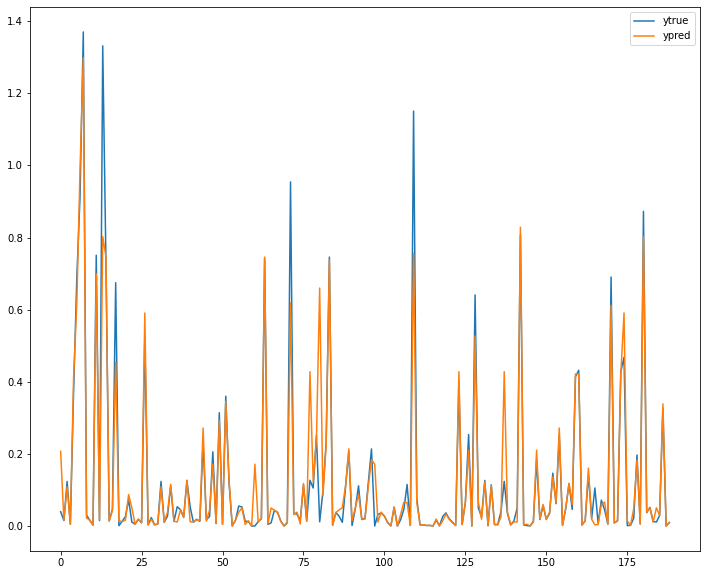

In [96]:
plt.figure(figsize=(12,10))
plt.plot(range(len(y_test)), y_test, y_pred)
plt.legend(["ytrue", "ypred"])
plt.show()

In [97]:
importance = treeregressor.feature_importances_
importance

array([1.80964611e-02, 3.77279434e-02, 1.61690436e-01, 2.34674361e-01,
       2.46609385e-02, 1.44560824e-01, 7.21808722e-05, 0.00000000e+00,
       0.00000000e+00, 2.18484562e-02, 8.16416887e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.57582143e-01, 1.06324798e-01,
       7.60067153e-04, 5.61702547e-03, 2.26966394e-04, 2.51165840e-03,
       2.00405285e-03])

In [133]:
import operator

l = []
for i, imp in enumerate(importance):
    l.append([imp, X.columns[i]])

nl = sorted(l, key = operator.itemgetter(0), reverse = True)
for i, item in enumerate(nl):
    nl[i].append(i+1)

nl

[[0.23467436065887334, 'Median Age', 1],
 [0.16169043567490354, 'GDP per Capita (US$)', 2],
 [0.15758214332530646, 'Employment to population ratio', 3],
 [0.14456082355397948, 'Govt. Share on Health Expenditure (%)', 4],
 [0.10632479762968271, 'Continent_Africa', 5],
 [0.08164168869508245, 'Religion_Islamic', 6],
 [0.03772794342204404, 'ART Coverage (%)', 7],
 [0.024660938523970603, 'Primary Completion rate (%)', 8],
 [0.021848456231376517, 'Religion_Hindu', 9],
 [0.018096461143276572, 'Year', 10],
 [0.005617025473155152, 'Continent_Europe', 11],
 [0.002511658399811644, 'Continent_Oceania', 12],
 [0.0020040528485382463, 'Continent_South America', 13],
 [0.0007600671534706795, 'Continent_Asia', 14],
 [0.00022696639437048676, 'Continent_North America', 15],
 [7.21808721581613e-05, 'Religion_Animist', 16],
 [0.0, 'Religion_Buddhism', 17],
 [0.0, 'Religion_Christianity', 18],
 [0.0, 'Religion_Non Religious', 19],
 [0.0, 'Religion_Shinto', 20],
 [0.0, 'Religion_Syncretic', 21]]

Feature # 1 - Median Age------------------------------ Score 0.23
Feature # 2 - GDP per Capita (US$)-------------------- Score 0.16
Feature # 3 - Employment to population ratio---------- Score 0.16
Feature # 4 - Govt. Share on Health Expenditure (%)--- Score 0.14
Feature # 5 - Continent_Africa------------------------ Score 0.11
Feature # 6 - Religion_Islamic------------------------ Score 0.08
Feature # 7 - ART Coverage (%)------------------------ Score 0.04
Feature # 8 - Primary Completion rate (%)------------- Score 0.02
Feature # 9 - Religion_Hindu-------------------------- Score 0.02
Feature #10 - Year------------------------------------ Score 0.02
Feature #11 - Continent_Europe------------------------ Score 0.01
Feature #12 - Continent_Oceania----------------------- Score 0.00
Feature #13 - Continent_South America----------------- Score 0.00
Feature #14 - Continent_Asia-------------------------- Score 0.00
Feature #15 - Continent_North America----------------- Score 0.00
Feature #1

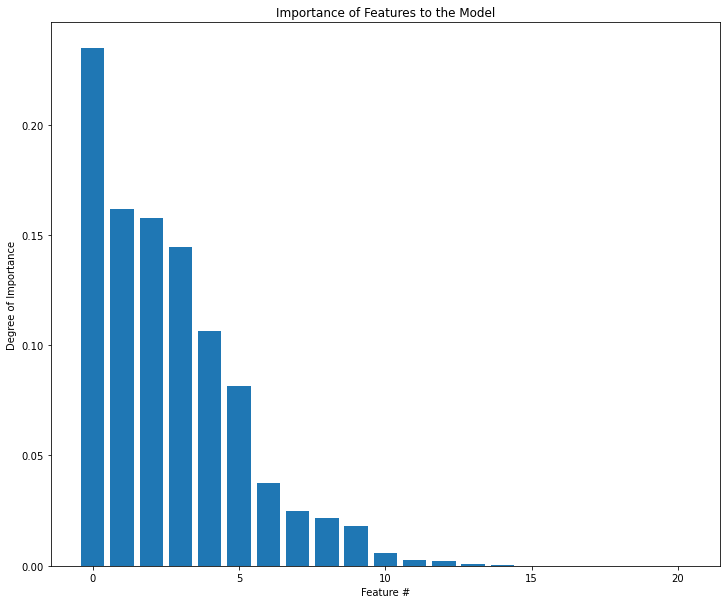

In [136]:

for imp, col, it in nl:
    print("Feature #{:2} - {:-<40} Score {:.2f}".format(it,col,imp))
plt.figure(figsize=(12,10))
plt.bar([x for x in range(len(nl))], [nl[x][0] for x in range(len(data))])
plt.xlabel("Feature #")
plt.ylabel("Degree of Importance")
plt.title("Importance of Features to the Model")
plt.show()